In [9]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, GRU, SimpleRNN
from keras.optimizers import RMSprop
from keras.models import Sequential
# from keras.engine import Model
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import Bidirectional

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def rnn_classif_network(T, D):
    inputs = Input(name='input', shape=[T, D])
    layer = SimpleRNN(50, return_sequences=False)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions)
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

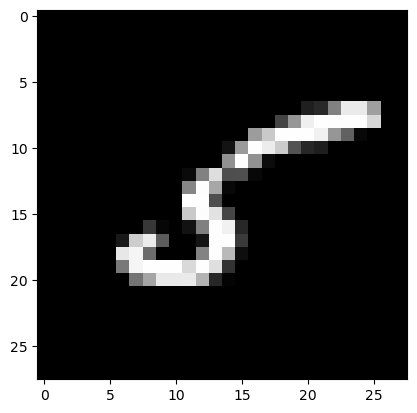

In [5]:
plt.imshow(x_train[11,:,:], cmap='gray')
plt.show()

### 1. Completez le code suivant

(60000, 28, 28)


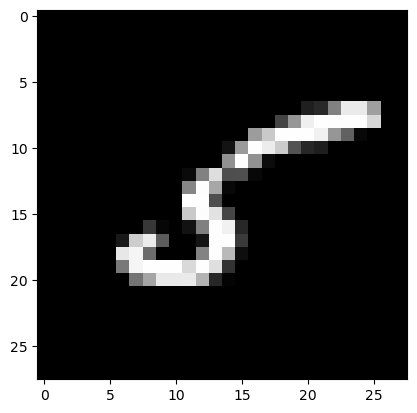

Epoch 1/3
625/625 [==============================] - 5s 7ms/step - loss: 1.6567 - accuracy: 0.4064 - val_loss: 1.4184 - val_accuracy: 0.4676
Epoch 2/3
625/625 [==============================] - 4s 7ms/step - loss: 1.3879 - accuracy: 0.4818 - val_loss: 1.3528 - val_accuracy: 0.4933
Epoch 3/3
625/625 [==============================] - 4s 6ms/step - loss: 1.3411 - accuracy: 0.4970 - val_loss: 1.3435 - val_accuracy: 0.4949


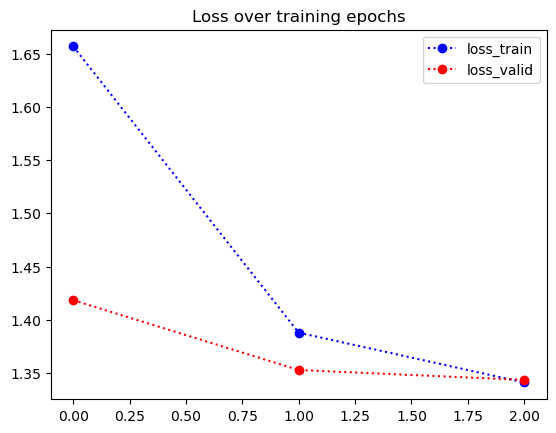

313/313 [==============================] - 1s 2ms/step - loss: 1.3577 - accuracy: 0.4904

TEST LOSS AND ACCURACY =  1.3577271699905396


In [10]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes =10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[FIN_APP:DEBUT_VALID]
    y_valid = y_train[FIN_APP:DEBUT_VALID]
    x_train = x_train[:FIN_APP]
    y_train = y_train[:FIN_APP]

    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, num_classes=nb_classes)
    y_test = to_categorical(y_test, num_classes=nb_classes)
    y_valid = to_categorical(y_valid, num_classes=nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent
    le_reseau = Sequential()
    le_reseau.add(SimpleRNN(units=50, input_shape=(T, D)))
    le_reseau.add(Dense(units=nb_classes, activation='softmax'))
    le_reseau.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    ###########################################################################
    # Apprentissage du réseau avec batch de None
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 3 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train, epochs=3, validation_data=(x_valid, y_valid))

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test, accuracy_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)


### 2. En vous inspirant du réseau de la première question,  completez la fonction rnn_classif_network et completez le code suivant :

In [6]:
def rnn_classif_network(T, D, couche, type_):   
    inputs = Input(shape=(T, D))
    layer = SimpleRNN(units=couche)(inputs)
    predictions = Dense(10, activation='softmax')(layer)
    network = Model(inputs=inputs, outputs=predictions) 
    network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return network

(60000, 28, 28)


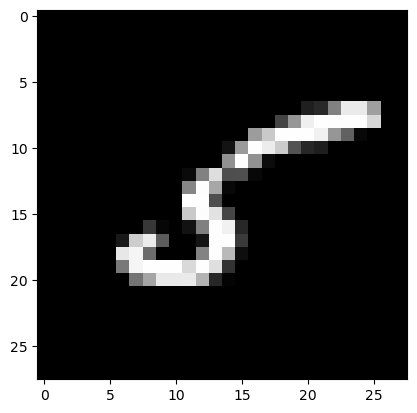

Epoch 1/10
2000/2000 [==============================] - 57s 27ms/step - loss: 0.6577 - accuracy: 0.7800 - val_loss: 0.4084 - val_accuracy: 0.8600
Epoch 2/10
2000/2000 [==============================] - 58s 29ms/step - loss: 0.3883 - accuracy: 0.8679 - val_loss: 0.3415 - val_accuracy: 0.8970
Epoch 3/10
2000/2000 [==============================] - 53s 26ms/step - loss: 0.3210 - accuracy: 0.8930 - val_loss: 0.2817 - val_accuracy: 0.9100
Epoch 4/10
2000/2000 [==============================] - 65s 33ms/step - loss: 0.2753 - accuracy: 0.9068 - val_loss: 0.2749 - val_accuracy: 0.9090
Epoch 5/10
2000/2000 [==============================] - 67s 33ms/step - loss: 0.2459 - accuracy: 0.9168 - val_loss: 0.2363 - val_accuracy: 0.9270
Epoch 6/10
2000/2000 [==============================] - 62s 31ms/step - loss: 0.2255 - accuracy: 0.9258 - val_loss: 0.2605 - val_accuracy: 0.9270
Epoch 7/10
2000/2000 [==============================] - 17s 8ms/step - loss: 0.2179 - accuracy: 0.9284 - val_loss: 0.2493 - 

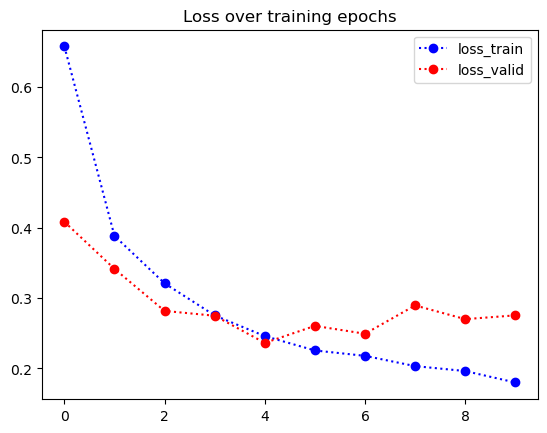

313/313 [==============================] - 2s 6ms/step - loss: 0.2544 - accuracy: 0.9201

TEST LOSS AND ACCURACY =  0.25444915890693665


In [11]:
if __name__ == '__main__':
    # x are of dimension nb_data 28 x 28 which is the size of each image
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    print(x_train.shape)
    # exemple pour visualiser la 11 ème image
    plt.imshow(x_train[11,:,:], cmap='gray')
    plt.show()

    nb_classes = 10
    nb_train, T, D = x_train.shape
    nb_test, T, D = x_test.shape
    # on réserve une base de valid
    FIN_APP = 20000
    DEBUT_VALID = 59000
    x_valid = x_train[DEBUT_VALID:,:,:]
    y_valid = y_train[DEBUT_VALID:]
    x_train = x_train[:FIN_APP,:,:]
    y_train = y_train[:FIN_APP]
    ###########################################################################
    # passage en encodage one-hot vector
    y_train = to_categorical(y_train, num_classes=nb_classes)
    y_test = to_categorical(y_test, num_classes=nb_classes)
    y_valid = to_categorical(y_valid, num_classes=nb_classes)
    ###########################################################################
    # Déclaration et compilation du réseau recurrent : utilisez un LSTM
    le_reseau = Sequential()
    le_reseau.add(LSTM(units=128, input_shape=(T, D)))
    le_reseau.add(Dense(units=nb_classes, activation='softmax'))
    le_reseau.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    ###########################################################################
    # Apprentissage du réseau avec batch de 10
    # Base de validation testee à la fin de chaque époque
    # nb_epch = 10 pour le moment
    # la méthode renvoie l'historique de l'apprentissage
    Enregistrement = le_reseau.fit(x_train, y_train, batch_size=10, epochs=10, validation_data=(x_valid, y_valid))

    ###########################################################################
    # On visualise l'historique de l'apprentissage
    loss_train = Enregistrement.history['loss']
    loss_valid = Enregistrement.history['val_loss']
    metric_train = Enregistrement.history['accuracy']
    metric_valid = Enregistrement.history['val_accuracy']
    plt.plot(loss_train,"b:o", label = "loss_train")
    plt.plot(loss_valid,"r:o", label = "loss_valid")
    plt.title("Loss over training epochs")
    plt.legend()
    plt.show()

    ############################################################################
    #on teste les performances du réseau entrainé
    loss_test, accuracy_test = le_reseau.evaluate(x_test, y_test)
    print("\nTEST LOSS AND ACCURACY = ", loss_test)

# Meilleur modèle

In [8]:
# Définir le reseau LSTM
net = Sequential()
cp = ModelCheckpoint("best.h5", verbose=1, save_best_only=True)
callback_list = [cp]
history = net.fit(x_train, y_train, epochs=10, validation_data=[x_valid, y_valid],
                  callbacks=callback_list, verbose=0)
print(history.history["loss"])

# on teste les performances du réseau entrainé
loss_train, accuracy_train = net.evaluate(x_train, y_train)
print("\nTRAIN LOSS AND ACCURACY = ", loss_train)
net.load_weights("best.h5")
loss_test = net.evaluate(x_test, y_test)


Epoch 1: val_loss improved from inf to 0.61163, saving model to best.h5

Epoch 2: val_loss improved from 0.61163 to 0.49574, saving model to best.h5

Epoch 3: val_loss improved from 0.49574 to 0.43598, saving model to best.h5

Epoch 4: val_loss improved from 0.43598 to 0.39273, saving model to best.h5

Epoch 5: val_loss improved from 0.39273 to 0.38238, saving model to best.h5

Epoch 6: val_loss improved from 0.38238 to 0.36321, saving model to best.h5

Epoch 7: val_loss improved from 0.36321 to 0.34658, saving model to best.h5

Epoch 8: val_loss did not improve from 0.34658

Epoch 9: val_loss improved from 0.34658 to 0.34393, saving model to best.h5

Epoch 10: val_loss did not improve from 0.34393
[1.1167117357254028, 0.6149123311042786, 0.5111326575279236, 0.4493299722671509, 0.40763112902641296, 0.3761867582798004, 0.3548247814178467, 0.331779420375824, 0.3129350543022156, 0.29914864897727966]
625/625 [==============================] - 2s 3ms/step - loss: 0.2757 - accuracy: 0.9081


In [12]:
print(len(x_train))

20000


In [13]:
print(len(x_valid))

1000
